In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [25]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [26]:
# check for missing values
for col in data.columns:
    print(col , " : ", data[col].isnull().sum())

url  :  0
 timedelta  :  0
 n_tokens_title  :  0
 n_tokens_content  :  0
 n_unique_tokens  :  0
 n_non_stop_words  :  0
 n_non_stop_unique_tokens  :  0
 num_hrefs  :  0
 num_self_hrefs  :  0
 num_imgs  :  0
 num_videos  :  0
 average_token_length  :  0
 num_keywords  :  0
 data_channel_is_lifestyle  :  0
 data_channel_is_entertainment  :  0
 data_channel_is_bus  :  0
 data_channel_is_socmed  :  0
 data_channel_is_tech  :  0
 data_channel_is_world  :  0
 kw_min_min  :  0
 kw_max_min  :  0
 kw_avg_min  :  0
 kw_min_max  :  0
 kw_max_max  :  0
 kw_avg_max  :  0
 kw_min_avg  :  0
 kw_max_avg  :  0
 kw_avg_avg  :  0
 self_reference_min_shares  :  0
 self_reference_max_shares  :  0
 self_reference_avg_sharess  :  0
 weekday_is_monday  :  0
 weekday_is_tuesday  :  0
 weekday_is_wednesday  :  0
 weekday_is_thursday  :  0
 weekday_is_friday  :  0
 weekday_is_saturday  :  0
 weekday_is_sunday  :  0
 is_weekend  :  0
 LDA_00  :  0
 LDA_01  :  0
 LDA_02  :  0
 LDA_03  :  0
 LDA_04  :  0
 global_su

In [4]:
# check data columns type
data.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [30]:
# removing unnecessary columns
data = data.drop(["url"], axis = 1)
data.dtypes

 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       float64
 kw_avg_max                       

In [6]:
# feature normalization function
def feature_normalization(X):
    n = X.shape[1]
    X_norm = X
    X_norm = pd.DataFrame(X_norm)
    mu = np.zeros(n)
    sigma = np.zeros(n)
    
    for i in range(n):
        mu[i] = np.mean(X_norm.iloc[:,i])
        sigma[i] = np.std(X_norm.iloc[:, i])
        X_norm.iloc[:, i] = (X_norm.iloc[:,i] - mu[i])/sigma[i]
        
    return X_norm

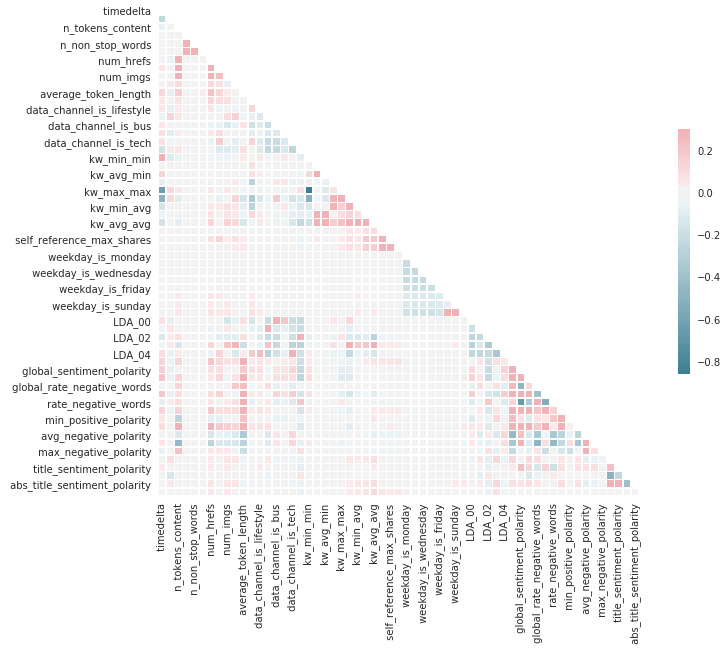

In [7]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
cols = data.columns
corr = data.corr()
columnsNotNeeded = []
for i in range(len(corr)):
    for j in range(len(corr[cols[i]])):
        if abs(corr[cols[i]][cols[j]]) >= 0.5 and i != j:
            if(i not in columnsNotNeeded):
                print(cols[i], " and ", cols[j], " have corr = ", corr[cols[i]][cols[j]])
                columnsNotNeeded.append(cols[j])

 timedelta  and   kw_min_min  have corr =  0.591198805932309
 timedelta  and   kw_max_max  have corr =  -0.6378239103664511
 n_unique_tokens  and   n_non_stop_words  have corr =  0.9995717371216517
 n_unique_tokens  and   n_non_stop_unique_tokens  have corr =  0.99985151601784
 n_non_stop_words  and   n_unique_tokens  have corr =  0.9995717371216517
 n_non_stop_words  and   n_non_stop_unique_tokens  have corr =  0.9995323282503519
 n_non_stop_unique_tokens  and   n_unique_tokens  have corr =  0.99985151601784
 n_non_stop_unique_tokens  and   n_non_stop_words  have corr =  0.9995323282503519
 average_token_length  and   global_subjectivity  have corr =  0.5976287201040001
 average_token_length  and   rate_positive_words  have corr =  0.5788940295047423
 average_token_length  and   avg_positive_polarity  have corr =  0.5401170166099064
 data_channel_is_entertainment  and   LDA_01  have corr =  0.5993837724656842
 data_channel_is_bus  and   LDA_00  have corr =  0.7746505220379106
 data_ch

In [9]:
corr[" shares"]

 timedelta                        0.008662
 n_tokens_title                   0.008783
 n_tokens_content                 0.002459
 n_unique_tokens                  0.000806
 n_non_stop_words                 0.000443
 n_non_stop_unique_tokens         0.000114
 num_hrefs                        0.045404
 num_self_hrefs                  -0.001900
 num_imgs                         0.039388
 num_videos                       0.023936
 average_token_length            -0.022007
 num_keywords                     0.021818
 data_channel_is_lifestyle        0.005831
 data_channel_is_entertainment   -0.017006
 data_channel_is_bus             -0.012376
 data_channel_is_socmed           0.005021
 data_channel_is_tech            -0.013253
 data_channel_is_world           -0.049497
 kw_min_min                      -0.001051
 kw_max_min                       0.030114
 kw_avg_min                       0.030406
 kw_min_max                       0.003901
 kw_max_max                       0.007863
 kw_avg_max

In [10]:
columnsNotNeeded = set(columnsNotNeeded)
len(columnsNotNeeded)

39

In [11]:
len(data.columns)

60

In [31]:
X = data.iloc[:,0:59]
y = data.iloc[:,-1]

In [32]:
# establish a baseline model
lr = LinearRegression()
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
lr.fit(Xtrain, ytrain)
lr.score(Xtest, ytest)

0.018866857053684072

In [15]:
data.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [16]:
neededColumns = [" n_non_stop_unique_tokens", " num_hrefs", " num_self_hrefs", " num_imgs", " num_videos", 
                ' data_channel_is_lifestyle',
               ' data_channel_is_socmed',
               ' kw_avg_min', ' kw_avg_max', ' kw_avg_avg', ' self_reference_avg_sharess',
                ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
               ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
               ' weekday_is_sunday', 
               ' LDA_03',
               ' global_sentiment_polarity',
                ' rate_positive_words',
               ' rate_negative_words',
               ' title_sentiment_polarity', ' abs_title_subjectivity',
               ' shares']
len(neededColumns)

25

In [17]:
newData = data[neededColumns]
X = newData.iloc[:,0:len(neededColumns)-1]
y = newData.iloc[:,-1]
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
lr.score(Xtest, ytest)

0.015282034482783868

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
rf.score(Xtest, ytest)

-0.2032513152345783

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(Xtrain, ytrain)
gb.score(Xtest, ytest)

0.0076841427595851775

In [21]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(Xtrain, ytrain)
ab.score(Xtest, ytest)

-1.5529604396761512

In [22]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(Xtrain, ytrain)
rr.score(Xtest, ytest)

0.01528327202149049

In [47]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(Xtrain, ytrain)
lr.score(Xtest, ytest)

/home/dhivya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.019033504885061614

In [42]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
param_grid = {'alpha': [0,1, 2,3,5,6,7,8,9, 10]}
rsearch = GridSearchCV(lr, param_grid, scoring="r2")
rsearch.fit(Xtrain, ytrain)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

/home/dhivya/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/dhivya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/dhivya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dhivya/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fi

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0, 1, 2, 3, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)
0.017155069224545644
10


In [43]:
print(rsearch.grid_scores_)

[mean: 0.01102, std: 0.00619, params: {'alpha': 0}, mean: -0.38242, std: 0.56310, params: {'alpha': 1}, mean: -0.07987, std: 0.13532, params: {'alpha': 2}, mean: 0.00202, std: 0.01958, params: {'alpha': 3}, mean: 0.01694, std: 0.00165, params: {'alpha': 5}, mean: 0.01699, std: 0.00166, params: {'alpha': 6}, mean: 0.01703, std: 0.00169, params: {'alpha': 7}, mean: 0.01708, std: 0.00170, params: {'alpha': 8}, mean: 0.01712, std: 0.00171, params: {'alpha': 9}, mean: 0.01716, std: 0.00172, params: {'alpha': 10}]


In [48]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=10)
lr.fit(Xtrain, ytrain)
lr.score(Xtest, ytest)

0.01919482980757259